In [2]:
!pip install pandas seaborn matplotlib

  Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached numpy-2.2.4-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp311-cp311-win_amd64.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp311-cp311-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl (11.6 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.1-cp311-cp

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 🔧 Configure Matplotlib style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [6]:
COMPANY_DIR = 'companies'


In [7]:
companies = sorted([d for d in os.listdir(COMPANY_DIR) if os.path.isdir(os.path.join(COMPANY_DIR, d))])
print("✅ Available Companies:")
for company in companies:
    print("-", company)

✅ Available Companies:
- AMD
- AQR Capital Management
- Accenture
- Accolite
- Acko
- Activision
- Adobe
- Affirm
- Agoda
- Airbnb
- Airbus SE
- Airtel
- Airwallex
- Akamai
- Akuna Capital
- Alibaba
- Altimetrik
- Amadeus
- Amazon
- Amdocs
- American Express
- Analytics quotient
- Anduril
- Aon
- Apollo.io
- AppDynamics
- AppFolio
- Apple
- Applied Intuition
- Arcesium
- Arista Networks
- Asana
- Atlassian
- Attentive
- Audible
- Aurora
- Autodesk
- Avalara
- Avito
- Axon
- BILL Holdings
- BNY Mellon
- BP
- Baidu
- Bank of America
- Barclays
- Bentley Systems
- BharatPe
- BitGo
- BlackRock
- BlackStone
- Blizzard
- Block
- Bloomberg
- Bolt
- Booking.com
- Bosch
- Box
- Braze
- Brex
- Bridgewater Associates
- ByteDance
- CARS24
- CEDCOSS
- CME Group
- CRED
- CTC
- CVENT
- Cadence
- Canonical
- Capgemini
- Capital One
- Careem
- Cashfree
- Celigo
- Chewy
- Chime
- Circle
- Cisco
- Citadel
- Citigroup
- Citrix
- Clari
- Cleartrip
- Cloudera
- Cloudflare
- Coforge
- Cognizant
- Cohesity
- 

In [8]:
selected_company = 'Amazon'  # Change this
company_folder = os.path.join(COMPANY_DIR, selected_company)
csv_files = sorted([f for f in os.listdir(company_folder) if f.endswith('.csv')])

In [9]:
print(f"\n📂 Found CSVs for {selected_company}:")
for f in csv_files:
    print("-", f)



📂 Found CSVs for Amazon:
- 1. Thirty Days.csv
- 2. Three Months.csv
- 3. Six Months.csv
- 4. More Than Six Months.csv
- 5. All.csv


In [10]:
dfs = []
for file in csv_files:
    path = os.path.join(company_folder, file)
    df = pd.read_csv(path)
    df['Source'] = file.split('.')[0]
    dfs.append(df)

In [12]:
for i, df in enumerate(dfs):
    print(f"DataFrame {i} columns: {df.columns.tolist()}")


DataFrame 0 columns: ['Difficulty', 'Title', 'Frequency', 'Acceptance Rate', 'Link', 'Topics', 'Source']
DataFrame 1 columns: ['Difficulty', 'Title', 'Frequency', 'Acceptance Rate', 'Link', 'Topics', 'Source']
DataFrame 2 columns: ['Difficulty', 'Title', 'Frequency', 'Acceptance Rate', 'Link', 'Topics', 'Source']
DataFrame 3 columns: ['Difficulty', 'Title', 'Frequency', 'Acceptance Rate', 'Link', 'Topics', 'Source']
DataFrame 4 columns: ['Difficulty', 'Title', 'Frequency', 'Acceptance Rate', 'Link', 'Topics', 'Source']


In [13]:
combined_df = pd.concat(dfs, ignore_index=True).dropna(subset=['Title', 'Link']).drop_duplicates(subset=['Title'])


In [20]:
if 'Difficulty' in combined_df.columns:
    difficulty_levels = combined_df['Difficulty'].unique()
    print("\nDifficulty Levels:", difficulty_levels)

    selected_difficulty = 'Easy'  # Change this to the difficulty you want (e.g., 'Easy', 'Medium', 'Hard')
    filtered_df = combined_df[combined_df['Difficulty'] == selected_difficulty]
else:
    filtered_df = combined_df  # If no 'Difficulty' column, show all questions



Difficulty Levels: ['MEDIUM' 'EASY' 'HARD']


In [21]:
print(f"\n🧠 Total Questions for {selected_company} (Difficulty: {selected_difficulty}): {len(filtered_df)}\n")
for i, row in filtered_df.iterrows():
    print(f"{i+1}. {row['Question']}")
    print(f"   🔗 {row['Link']}")
    print(f"   🔁 Frequency: {row.get('Frequency', 'N/A')}")
    print("---")



🧠 Total Questions for Amazon (Difficulty: Easy): 0



In [15]:
print(f"\n🧠 Total Questions for {selected_company}: {len(combined_df)}\n")
for i, row in combined_df.iterrows():
    print(f"{i+1}. {row['Title']}")
    print(f"   🔗 {row['Link']}")
    print(f"   🔁 Frequency: {row.get('Frequency', 'N/A')}")
    print("---")



🧠 Total Questions for Amazon: 205

1. LRU Cache
   🔗 https://leetcode.com/problems/lru-cache
   🔁 Frequency: 100.0
---
2. Reorganize String
   🔗 https://leetcode.com/problems/reorganize-string
   🔁 Frequency: 90.5
---
3. Two Sum
   🔗 https://leetcode.com/problems/two-sum
   🔁 Frequency: 85.8
---
4. Number of Islands
   🔗 https://leetcode.com/problems/number-of-islands
   🔁 Frequency: 81.5
---
5. Analyze User Website Visit Pattern
   🔗 https://leetcode.com/problems/analyze-user-website-visit-pattern
   🔁 Frequency: 79.9
---
6. Merge Intervals
   🔗 https://leetcode.com/problems/merge-intervals
   🔁 Frequency: 78.2
---
7. Trapping Rain Water
   🔗 https://leetcode.com/problems/trapping-rain-water
   🔁 Frequency: 78.2
---
8. House Robber
   🔗 https://leetcode.com/problems/house-robber
   🔁 Frequency: 78.2
---
9. Longest Substring Without Repeating Characters
   🔗 https://leetcode.com/problems/longest-substring-without-repeating-characters
   🔁 Frequency: 72.1
---
10. 3Sum
   🔗 https://leet

In [22]:
top_df = combined_df.sort_values(by='Frequency', ascending=False).head(10)


C:\Users\hp\AppData\Local\Temp\ipykernel_6424\503440894.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_df, y='Title', x='Frequency', palette='coolwarm')
C:\Users\hp\AppData\Local\Temp\ipykernel_6424\503440894.py:5: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\hp\anaconda3\envs\question_sheet\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


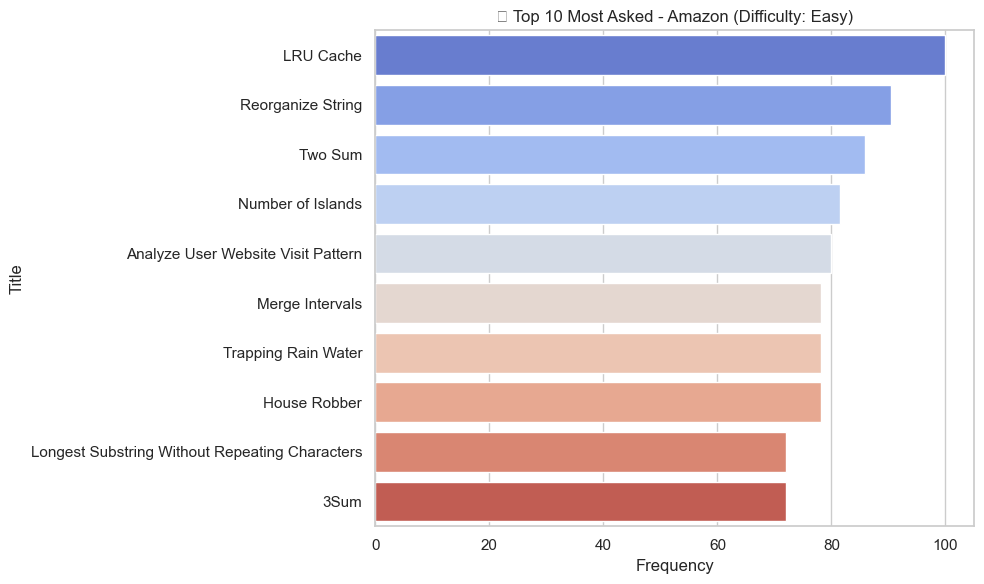

In [24]:

sns.barplot(data=top_df, y='Title', x='Frequency', palette='coolwarm')
plt.title(f"🔥 Top 10 Most Asked - {selected_company} (Difficulty: {selected_difficulty})")
plt.xlabel("Frequency")
plt.ylabel("Title")
plt.tight_layout()
plt.show()